In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [3]:
# load data 
meters = pd.read_csv("C://Users//Oluwajuwon//Documents//Smart Systems//Projects//Data Science Projects//project_notebooks//combined_data.csv")

In [4]:
meters.head()

,Unnamed: 0,meter_id,w_timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita,hour,time_diff
0,0,OND023,2022-07-12 13:57:30.449294+00:00,0.79,210.1,50.1,0.75,NaN,0.124484,0.109785,0.165979,41.409622,14,0.009675
1,1,OND023,2022-07-12 13:58:42.793010+00:00,0.80,210.6,50.0,0.75,0.002539,0.126360,0.111439,0.168480,41.409622,14,0.009675
2,2,OND023,2022-07-12 14:00:28.080361+00:00,0.85,208.3,50.0,0.74,0.003832,0.131021,0.119088,0.177055,42.268584,15,0.009675
3,3,OND023,2022-07-12 14:01:00.914557+00:00,0.74,208.5,50.0,0.76,0.001069,0.117260,0.100277,0.154290,40.535802,15,0.009675
4,4,OND023,2022-07-12 14:01:34.931821+00:00,0.74,208.1,49.9,0.76,0.001106,0.117035,0.100084,0.153994,40.535802,15,0.009675


In [5]:
meters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306708 entries, 0 to 306707
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      306708 non-null  int64  
 1   meter_id        306708 non-null  object 
 2   w_timestamp     306708 non-null  object 
 3   current         306708 non-null  float64
 4   voltage         306708 non-null  float64
 5   frequency       306708 non-null  float64
 6   power_factor    306708 non-null  float64
 7   energy          306705 non-null  float64
 8   real_power      306708 non-null  float64
 9   reactive_power  306708 non-null  float64
 10  apparent_power  306708 non-null  float64
 11  tita            306708 non-null  float64
 12  hour            306708 non-null  int64  
 13  time_diff       306708 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 32.8+ MB


In [6]:
on23 = meters[meters['meter_id'] == "OND023"]
oy21 = meters[meters['meter_id'] == "OYO021"]
on21 = meters[meters['meter_id'] == "OND021"]
on24 = meters[meters['meter_id'] == "OND024"]

In [7]:
on23.rename(columns={'w_timestamp':'timestamp'})

,Unnamed: 0,meter_id,timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita,hour,time_diff
0,0,OND023,2022-07-12 13:57:30.449294+00:00,0.79,210.1,50.1,0.75,NaN,0.124484,0.109785,0.165979,41.409622,14,0.009675
1,1,OND023,2022-07-12 13:58:42.793010+00:00,0.80,210.6,50.0,0.75,0.002539,0.126360,0.111439,0.168480,41.409622,14,0.009675
2,2,OND023,2022-07-12 14:00:28.080361+00:00,0.85,208.3,50.0,0.74,0.003832,0.131021,0.119088,0.177055,42.268584,15,0.009675
3,3,OND023,2022-07-12 14:01:00.914557+00:00,0.74,208.5,50.0,0.76,0.001069,0.117260,0.100277,0.154290,40.535802,15,0.009675
4,4,OND023,2022-07-12 14:01:34.931821+00:00,0.74,208.1,49.9,0.76,0.001106,0.117035,0.100084,0.153994,40.535802,15,0.009675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161079,161079,OND023,2022-10-22 21:35:34.272836+00:00,1.92,229.1,49.9,0.90,0.003651,0.395885,0.191736,0.439872,25.841933,22,0.009675
161080,161080,OND023,2022-10-22 21:36:08.484019+00:00,1.63,229.1,49.9,0.93,0.003300,0.347293,0.137259,0.373433,21.565185,22,0.009675
161081,161081,OND023,2022-10-22 21:36:43.545834+00:00,1.62,229.5,50.0,0.93,0.003368,0.345765,0.136655,0.371790,21.565185,22,0.009675
161082,161082,OND023,2022-10-22 21:38:28.735422+00:00,1.50,230.9,50.1,0.75,0.007590,0.259763,0.229089,0.346350,41.409622,22,0.009675


In [8]:
def clean(df):
    df = df.dropna()
    df = df.iloc[:,[2,7]]
    df['w_timestamp'] = pd.to_datetime(df['w_timestamp'])
    df = df.rename(columns = {'w_timestamp':'timestamp'})
    return df

In [9]:
on23_energy = clean(on23)

In [10]:
on23_energy

,timestamp,energy
1,2022-07-12 13:58:42.793010+00:00,0.002539
2,2022-07-12 14:00:28.080361+00:00,0.003832
3,2022-07-12 14:01:00.914557+00:00,0.001069
4,2022-07-12 14:01:34.931821+00:00,0.001106
5,2022-07-12 14:02:10.738666+00:00,0.001164
...,...,...
161079,2022-10-22 21:35:34.272836+00:00,0.003651
161080,2022-10-22 21:36:08.484019+00:00,0.003300
161081,2022-10-22 21:36:43.545834+00:00,0.003368
161082,2022-10-22 21:38:28.735422+00:00,0.007590


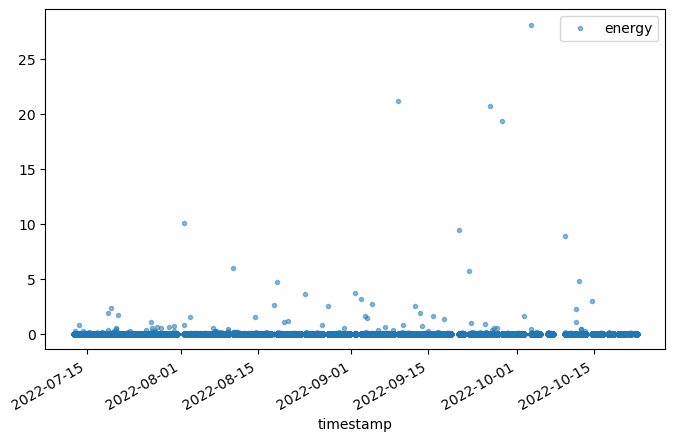

In [11]:
on23_energy.set_index('timestamp').plot(style='.',figsize=(8,5), alpha=0.5);

In [12]:
# check the indices of the outliers
on23_energy[on23_energy['energy'] >= 5].index

Int64Index([39276, 57111, 106223, 123474, 125489, 131583, 133562, 140491,
            145842],
           dtype='int64')

**Comparing the outliers to their surrounding values**

In [13]:
on23_energy[39276-5:39276+5]

,timestamp,energy
39272,2022-07-31 08:16:14.175370+00:00,0.003312
39273,2022-07-31 08:16:50.253476+00:00,0.003649
39274,2022-07-31 08:17:24.302489+00:00,0.003441
39275,2022-07-31 08:18:00.425344+00:00,0.003666
39276,2022-08-01 14:23:55.344421+00:00,10.109917
39277,2022-08-01 14:24:30.125847+00:00,0.002527
39278,2022-08-01 14:25:06.173362+00:00,0.002508
39279,2022-08-01 14:25:40.297840+00:00,0.002311
39280,2022-08-01 14:27:25.166536+00:00,0.007101
39281,2022-08-01 14:28:03.112692+00:00,0.002567


In [14]:
on23_energy[106223-5:106223+5]

,timestamp,energy
106219,2022-09-08 16:21:32.259691+00:00,0.003329
106220,2022-09-08 16:22:07.266646+00:00,0.003351
106221,2022-09-08 16:22:42.315388+00:00,0.003373
106222,2022-09-08 16:23:52.400511+00:00,0.006693
106223,2022-09-09 13:14:49.295144+00:00,21.180010
106224,2022-09-09 13:15:58.177206+00:00,0.018553
106225,2022-09-09 13:16:34.283924+00:00,0.009486
106226,2022-09-09 13:17:08.289692+00:00,0.008772
106227,2022-09-09 13:17:43.330812+00:00,0.008986
106228,2022-09-09 13:18:53.381561+00:00,0.017586


In [15]:
on23_energy[131583-5:131583+5]

,timestamp,energy
131579,2022-09-25 13:47:38.345544+00:00,0.001933
131580,2022-09-25 13:48:13.518639+00:00,0.000960
131581,2022-09-25 13:48:48.687467+00:00,0.000974
131582,2022-09-25 13:49:23.481290+00:00,0.000950
131583,2022-09-26 05:37:38.091642+00:00,20.664537
131584,2022-09-26 05:38:12.948940+00:00,0.011382
131585,2022-09-26 05:38:49.315579+00:00,0.011214
131586,2022-09-26 05:39:23.125468+00:00,0.010124
131587,2022-09-26 05:39:57.031914+00:00,0.010202
131588,2022-09-26 05:40:33.133455+00:00,0.010875


In [16]:
on23_energy[133562-5:133562+5]

,timestamp,energy
133558,2022-09-27 13:57:45.411574+00:00,0.000512
133559,2022-09-27 13:58:20.580844+00:00,0.000513
133560,2022-09-27 13:59:34.756135+00:00,0.001080
133561,2022-09-27 14:00:05.048451+00:00,0.000441
133562,2022-09-28 09:46:35.554955+00:00,19.310304
133563,2022-09-28 09:47:10.585309+00:00,0.009370
133564,2022-09-28 09:47:45.518078+00:00,0.009103
133565,2022-09-28 09:49:34.407519+00:00,0.027301
133566,2022-09-28 09:50:05.872354+00:00,0.007816
133567,2022-09-28 09:51:16.144718+00:00,0.000107


In [17]:
on23_energy[140491-5:140491+5]

,timestamp,energy
140487,2022-10-02 10:16:48.594891+00:00,0.001087
140488,2022-10-02 10:17:23.657131+00:00,0.001089
140489,2022-10-02 10:17:58.673387+00:00,0.001088
140490,2022-10-02 10:18:33.735410+00:00,0.001089
140491,2022-10-03 13:02:47.038115+00:00,28.091988
140492,2022-10-03 13:03:22.035745+00:00,0.009921
140493,2022-10-03 13:03:57.010643+00:00,0.009696
140494,2022-10-03 13:04:32.014965+00:00,0.003351
140495,2022-10-03 13:05:07.057976+00:00,0.011606
140496,2022-10-03 13:05:42.195958+00:00,0.025327


In [18]:
on23_energy[57111-5:57111+5]

,timestamp,energy
57107,2022-08-09 18:04:20.767627+00:00,0.000537
57108,2022-08-09 18:04:55.764934+00:00,0.000543
57109,2022-08-09 18:05:31.821920+00:00,0.000559
57110,2022-08-09 18:06:05.743155+00:00,0.000525
57111,2022-08-10 12:35:49.102419+00:00,5.960742
57112,2022-08-10 12:36:23.549294+00:00,0.002918
57113,2022-08-10 12:36:58.551202+00:00,0.002865
57114,2022-08-10 12:37:33.581390+00:00,0.002865
57115,2022-08-10 12:38:12.155707+00:00,0.003380
57116,2022-08-10 12:38:44.797544+00:00,0.002827


In [19]:
on23_energy[123474-5:123474+5]

,timestamp,energy
123470,2022-09-19 01:53:33.013078+00:00,0.000008
123471,2022-09-19 01:54:08.040094+00:00,0.000008
123472,2022-09-19 01:54:43.153991+00:00,0.000008
123473,2022-09-19 01:55:19.146815+00:00,0.000008
123474,2022-09-20 13:53:23.180365+00:00,9.412459
123475,2022-09-20 13:53:57.524969+00:00,0.002256
123476,2022-09-20 13:54:32.339033+00:00,0.001931
123477,2022-09-20 13:55:07.080216+00:00,0.001908
123478,2022-09-20 13:55:43.525813+00:00,0.001992
123479,2022-09-20 13:56:17.570798+00:00,0.001887


In [20]:
on23_energy[125489-5:125489+5]

,timestamp,energy
125485,2022-09-21 11:34:30.215860+00:00,0.001895
125486,2022-09-21 11:35:06.280692+00:00,0.001785
125487,2022-09-21 11:35:40.100509+00:00,0.001634
125488,2022-09-21 11:36:15.494309+00:00,0.001736
125489,2022-09-22 10:36:19.250793+00:00,5.696538
125490,2022-09-22 10:36:51.534421+00:00,0.001721
125491,2022-09-22 10:37:26.472409+00:00,0.001683
125492,2022-09-22 10:38:01.961973+00:00,0.001688
125493,2022-09-22 10:38:40.115849+00:00,0.001811
125494,2022-09-22 10:39:11.787150+00:00,0.001500


In [21]:
on23_energy[145842-5:145842+5]

,timestamp,energy
145838,2022-10-07 13:18:26.178373+00:00,0.000660
145839,2022-10-07 13:19:00.023183+00:00,0.000616
145840,2022-10-07 13:19:35.062935+00:00,0.000638
145841,2022-10-07 13:20:10.108377+00:00,0.000637
145842,2022-10-09 18:31:50.668615+00:00,8.871263
145843,2022-10-09 18:33:00.368742+00:00,0.013289
145844,2022-10-09 18:33:35.357981+00:00,0.006248
145845,2022-10-09 18:34:10.354757+00:00,0.001874
145846,2022-10-09 18:35:20.397453+00:00,0.003751
145847,2022-10-09 18:35:58.371624+00:00,0.002041


**They all occured on the first observation of their days**

In [22]:
# group by to check the first occurence of each days
first = on23_energy.groupby(on23_energy.timestamp.dt.date).first()

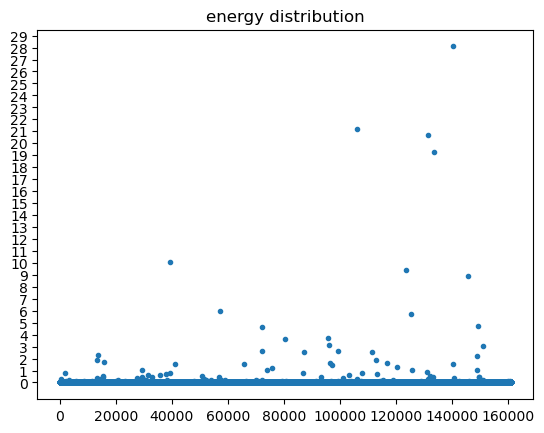

In [23]:
on23_energy['energy'].plot(style='.')
plt.title('energy distribution')
plt.yticks(np.arange(0,30));

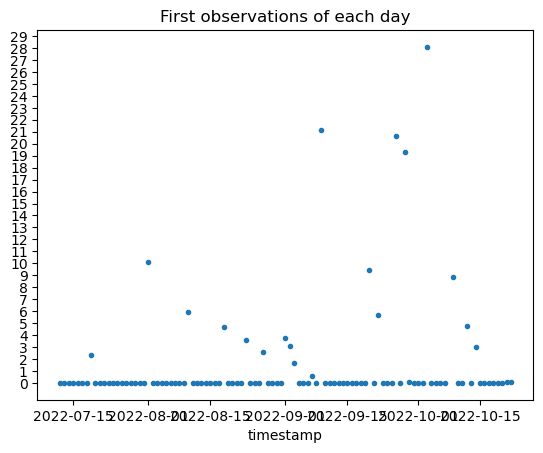

In [24]:
first['energy'].plot(style='.')
plt.title('First observations of each day')
plt.yticks(np.arange(0,30));

**Verify whether the high observations really occurred on first observations**

In [25]:
len(first[first['energy'] >= 2]) == len(on23_energy[on23_energy['energy'] >= 2])

False

In [26]:
len(first[first['energy'] >= 1]) == len(on23_energy[on23_energy['energy'] >= 1])

False

In [27]:
len(first[first['energy'] >= 3]) == len(on23_energy[on23_energy['energy'] >= 3])

True

In [28]:
first[first['energy'] >= 3].reset_index(drop=True).timestamp == \
on23_energy[on23_energy['energy'] >= 3].reset_index(drop=True).timestamp

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
Name: timestamp, dtype: bool

**High energy consumption happened on the first occurence of some days.the first reading of the meter was unusually high on these days. These high values are greater or equal to 3**

In [29]:
# drop energies greater or equal to 3
ids = on23_energy[on23_energy['energy'] >= 3].index

on23_energy_cleaned = on23_energy.drop(index=ids)

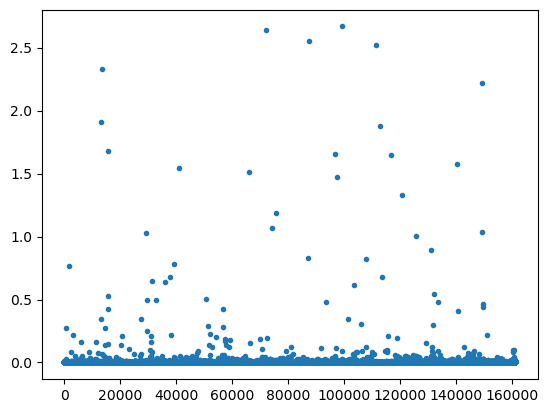

In [30]:
on23_energy_cleaned['energy'].plot(style='.');

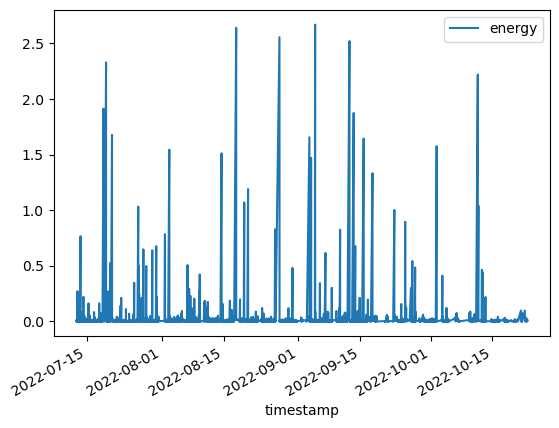

In [31]:
on23_energy_cleaned.set_index('timestamp').plot();

In [32]:
np.random.randint(0,2,12)

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1])

In [33]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10)

In [34]:
on23_energy_cleaned

,timestamp,energy
1,2022-07-12 13:58:42.793010+00:00,0.002539
2,2022-07-12 14:00:28.080361+00:00,0.003832
3,2022-07-12 14:01:00.914557+00:00,0.001069
4,2022-07-12 14:01:34.931821+00:00,0.001106
5,2022-07-12 14:02:10.738666+00:00,0.001164
...,...,...
161079,2022-10-22 21:35:34.272836+00:00,0.003651
161080,2022-10-22 21:36:08.484019+00:00,0.003300
161081,2022-10-22 21:36:43.545834+00:00,0.003368
161082,2022-10-22 21:38:28.735422+00:00,0.007590


In [37]:
def extract_values(df):
    df['year'] = df['timestamp'].dt.year
    df['month'] = df['timestamp'].dt.month
    df['day'] = df['timestamp'].dt.isocalendar().day
    df['week'] = df['timestamp'].dt.isocalendar().week
    df['hour'] = df['timestamp'].dt.hour
    df['minute'] = df['timestamp'].dt.minute
    df['second'] = df['timestamp'].dt.second
    df['microsecond'] = df['timestamp'].dt.microsecond
    df = df.drop(columns= ['timestamp'])
    return df

In [39]:
clean_data = extract_values(on23_energy_cleaned)

In [40]:
clean_data.columns[2:]

Index(['month', 'day', 'week', 'hour', 'minute', 'second', 'microsecond'], dtype='object')

In [43]:
from sklearn.svm import SVR

svr_model = SVR()

In [57]:
def data_model_scaled(df=clean_data,model=svr_model):
    
#     global train_rmse,test_rmse,train_mae,test_mae,train_mape,test_mape,train_pred,test_pred
    x_columns = clean_data.columns[2:]
    train_rmse = []
    test_rmse = []

    train_mae = []
    test_mae = []

    train_mape = []
    test_mape = []
        
    for train_index, test_index in tscv.split(df):
        train = df.iloc[train_index]
        test = df.iloc[test_index]

        x_train = train[x_columns]
        y_train = train['energy']
        
        x_test = test[x_columns]
        y_test = test['energy']
        
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        x_train = scaler.fit_transform(x_train)
        
        model.fit(x_train,y_train)

        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)

        #scores 

        train_rmse.append(np.sqrt(mean_squared_error(y_train,train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test,test_pred)))

        train_mae.append(np.sqrt(mean_absolute_error(y_train,train_pred)))
        test_mae.append(np.sqrt(mean_absolute_error(y_test,test_pred)))

        train_mape.append(np.sqrt(mean_absolute_percentage_error(y_train,train_pred)))
        test_mape.append(np.sqrt(mean_absolute_percentage_error(y_test,test_pred)))

        
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=[10,5])
    fig.set_facecolor('grey')
    ax1.plot(train_rmse, label = 'train')
    ax1.plot(test_rmse, label = 'test')
    ax1.set_title('RMSE')
    ax1.grid()
    ax1.legend()
    ax2.plot(train_mae, label = 'train')
    ax2.plot(test_mae, label = 'test')
    ax2.set_title('MAE')
    ax2.grid()
    ax2.legend()
    ax3.plot(train_mape, label = 'train')
    ax3.plot(test_mape, label = 'test')
    ax3.set_title('MAPE')
    ax3.legend()
    plt.grid();
    
    plt.figure(figsize = [10,5])
    plt.subplot(1,3,1)
    pd.DataFrame([train_rmse,test_rmse],index=['train','test']).transpose().mean().plot(kind='bar')
    plt.title('Average_RMSE')
    plt.subplot(1,3,2)
    pd.DataFrame([train_mae,test_mae],index=['train','test']).transpose().mean().plot(kind='bar')
    plt.title('Average_MAE')
    plt.subplot(1,3,3)
    pd.DataFrame([train_mape,test_mape],index=['train','test']).transpose().mean().plot(kind='bar')
    plt.title('Average_MAPE');
    
    
    plt.figure(figsize=[8,5])
    plt.plot(np.array(y_test), label='test')
    plt.plot(test_pred, label='pred')
    plt.title('Test vs Pred')
    plt.legend();

#     return train_rmse,test_rmse,train_mae,test_mae,train_mape,test_mape,train_pred, test_pred

In [58]:
def data_model_non_scaled(df=clean_data,model=svr_model):
    
    global train_rmse,test_rmse,train_mae,test_mae,train_mape,test_mape,train_pred,test_pred
    x_columns = clean_data.columns[2:]
    train_rmse = []
    test_rmse = []

    train_mae = []
    test_mae = []

    train_mape = []
    test_mape = []
        
    for train_index, test_index in tscv.split(df):
        train = df.iloc[train_index]
        test = df.iloc[test_index]

        x_train = train[x_columns]
        y_train = train['energy']
        
        x_test = test[x_columns]
        y_test = test['energy']
        
                
        model.fit(x_train,y_train)

        train_pred = model.predict(x_train)
        test_pred = model.predict(x_test)

        #scores 

        train_rmse.append(np.sqrt(mean_squared_error(y_train,train_pred)))
        test_rmse.append(np.sqrt(mean_squared_error(y_test,test_pred)))

        train_mae.append(np.sqrt(mean_absolute_error(y_train,train_pred)))
        test_mae.append(np.sqrt(mean_absolute_error(y_test,test_pred)))

        train_mape.append(np.sqrt(mean_absolute_percentage_error(y_train,train_pred)))
        test_mape.append(np.sqrt(mean_absolute_percentage_error(y_test,test_pred)))

        
    fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=[10,5])
    fig.set_facecolor('grey')
    ax1.plot(train_rmse, label = 'train')
    ax1.plot(test_rmse, label = 'test')
    ax1.set_title('RMSE')
    ax1.grid()
    ax1.legend()
    ax2.plot(train_mae, label = 'train')
    ax2.plot(test_mae, label = 'test')
    ax2.set_title('MAE')
    ax2.grid()
    ax2.legend()
    ax3.plot(train_mape, label = 'train')
    ax3.plot(test_mape, label = 'test')
    ax3.set_title('MAPE')
    ax3.legend()
    plt.grid();
    
    plt.figure(figsize = [10,5])
    plt.subplot(1,3,1)
    pd.DataFrame([train_rmse,test_rmse],index=['train','test']).transpose().mean().plot(kind='bar')
    plt.title('Average_RMSE')
    plt.subplot(1,3,2)
    pd.DataFrame([train_mae,test_mae],index=['train','test']).transpose().mean().plot(kind='bar')
    plt.title('Average_MAE')
    plt.subplot(1,3,3)
    pd.DataFrame([train_mape,test_mape],index=['train','test']).transpose().mean().plot(kind='bar')
    plt.title('Average_MAPE');
    
    plt.figure(figsize=[8,5])
    plt.plot(np.array(y_test), label='test')
    plt.plot(test_pred, label='pred')
    plt.title('Test vs Pred')
    plt.legend();

#     return train_rmse,test_rmse,train_mae,test_mae,train_mape,test_mape,train_pred, test_pred

Wall time: 4min 28s


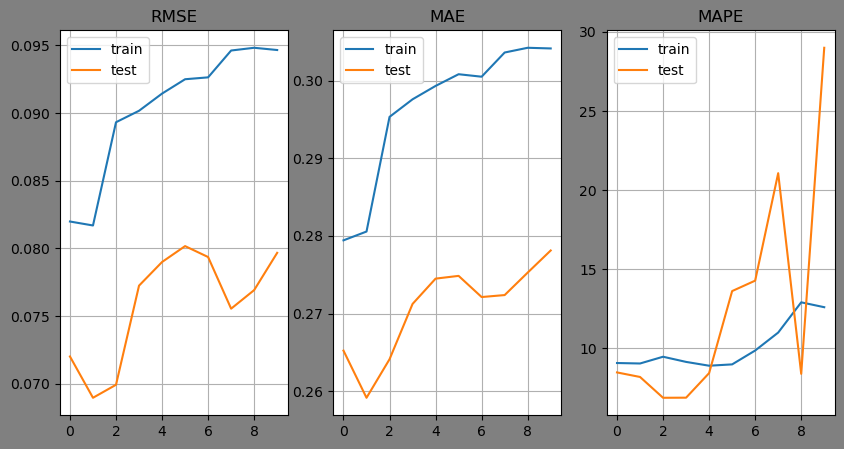

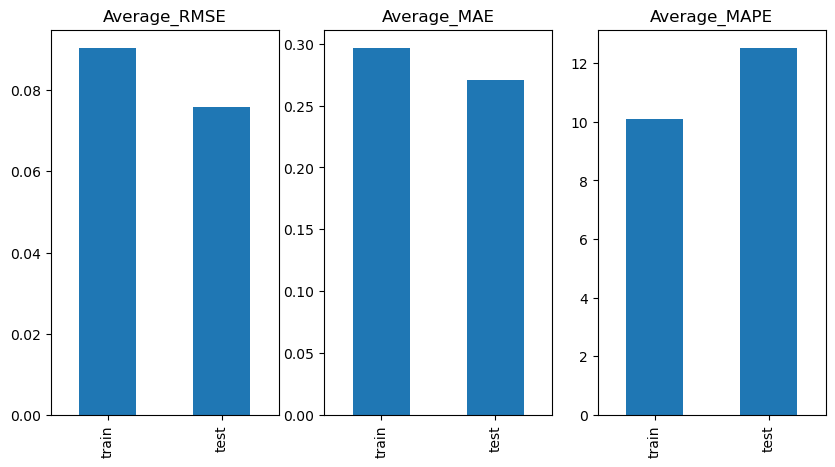

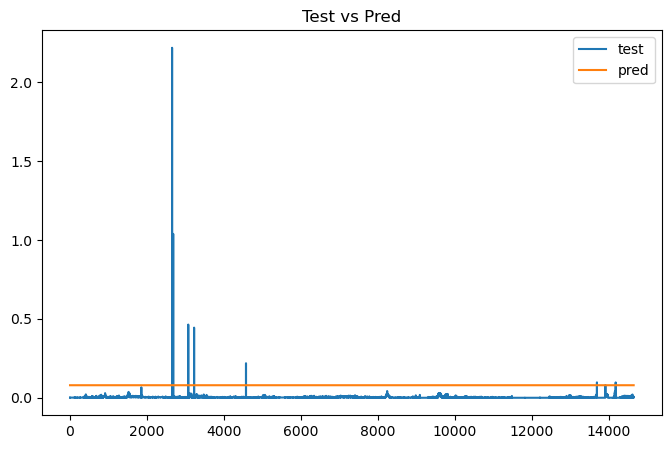

In [59]:
%%time

data_model_scaled()

Wall time: 29.1 s


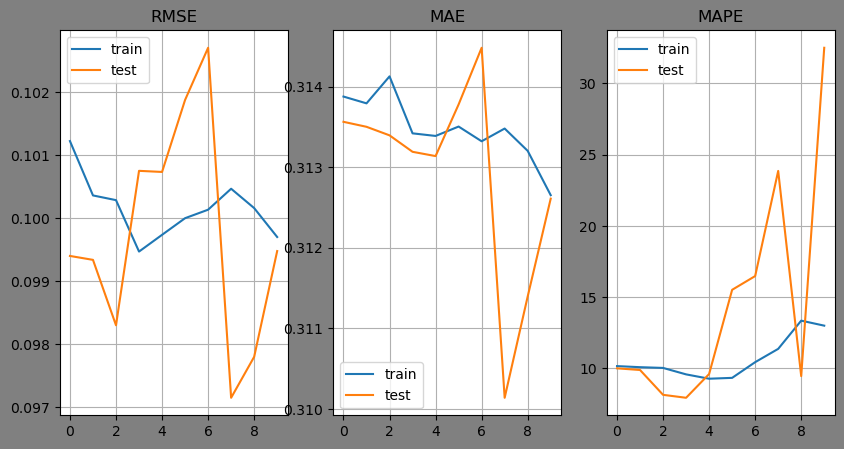

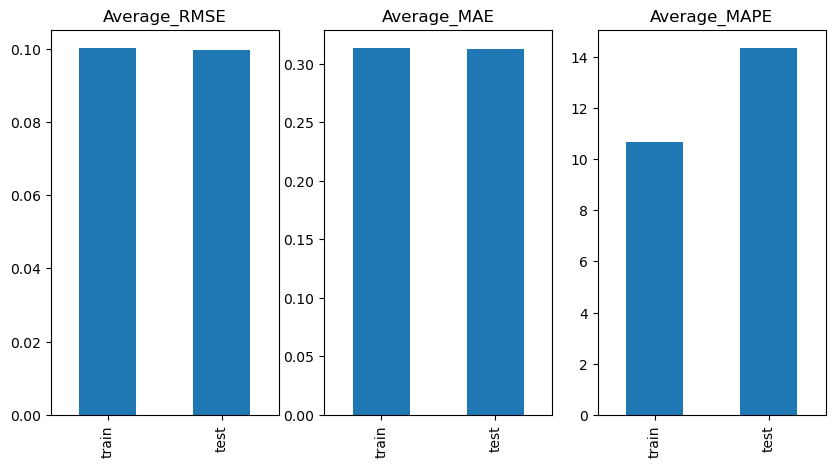

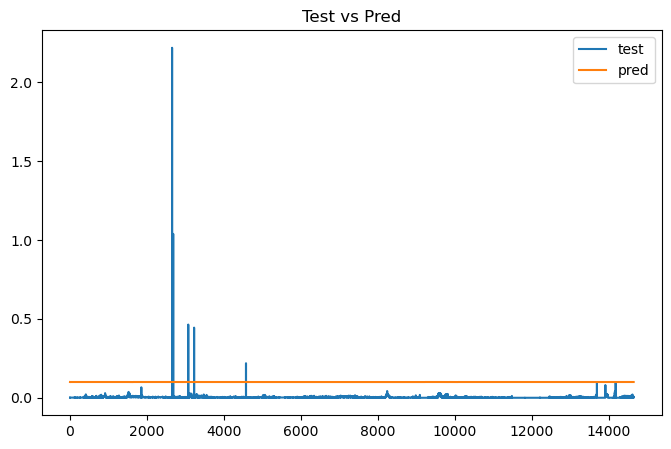

In [61]:
%%time

data_model_non_scaled()

In [78]:
from prophet import Prophet

prp_model = Prophet(changepoint_prior_scale=0.01)

In [74]:
df_energy = on23_energy_cleaned.iloc[:,:2].copy().rename(columns={'timestamp':'ds','energy':'y'})
df_energy['ds'] = df_energy['ds'].dt.tz_localize(None)
df_energy.head()

,ds,y
1,2022-07-12 13:58:42.793010,0.002539
2,2022-07-12 14:00:28.080361,0.003832
3,2022-07-12 14:01:00.914557,0.001069
4,2022-07-12 14:01:34.931821,0.001106
5,2022-07-12 14:02:10.738666,0.001164


In [76]:
data_len = len(df_energy)
test_size = int(0.2*data_len)
train = df_energy[:-test_size]
test = df_energy[-test_size:]

In [79]:
%%time
prp_model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\Oluwajuwon\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Wall time: 53.1 s


In [81]:
prp_preds = prp_model.predict(test)

C:\Users\Oluwajuwon\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Oluwajuwon\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [83]:
prp_preds['yhat']

0        0.004431
1        0.004433
2        0.004435
3        0.004437
4        0.004439
           ...   
32208    0.009351
32209    0.009343
32210    0.009335
32211    0.009312
32212    0.009304
Name: yhat, Length: 32213, dtype: float64

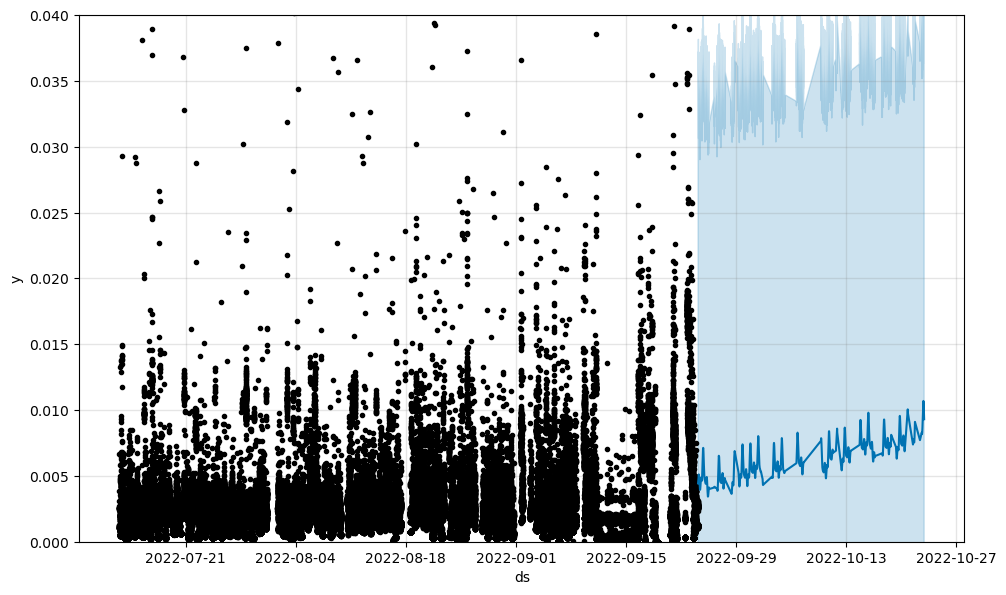

In [92]:
prp_model.plot(prp_preds)
# prp_model.plot(test['y'])
plt.ylim(0,0.04);

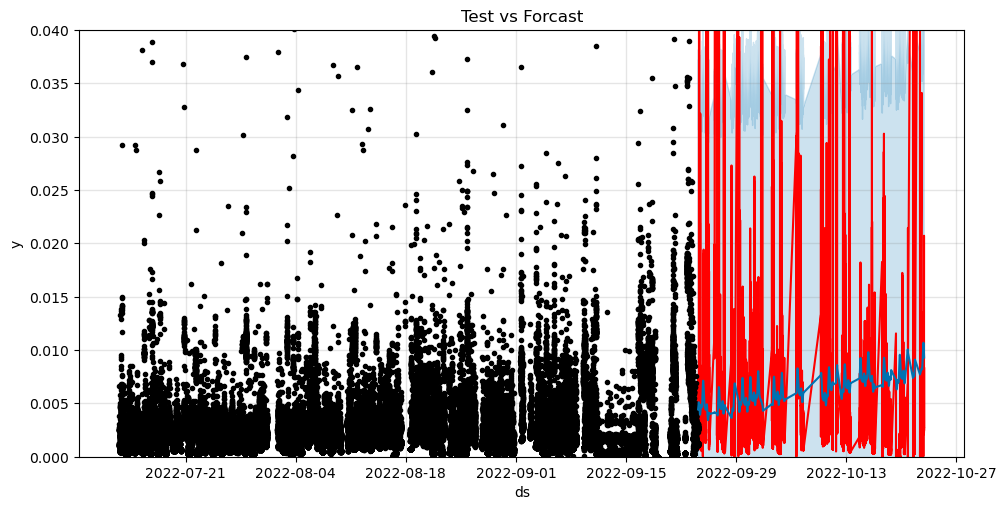

In [104]:
f, ax = plt.subplots(figsize=(10,5))
ax.plot(test['ds'],test['y'],color='r')
fig = prp_model.plot(prp_preds,ax=ax)

plt.title('Test vs Forcast')
plt.ylim(0,0.04);

In [107]:
pr_rmse = np.sqrt(mean_squared_error(test['y'],prp_preds['yhat']))
pr_mae = mean_absolute_error(test['y'],prp_preds['yhat'])
pr_mape = mean_absolute_percentage_error(test['y'],prp_preds['yhat'])

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

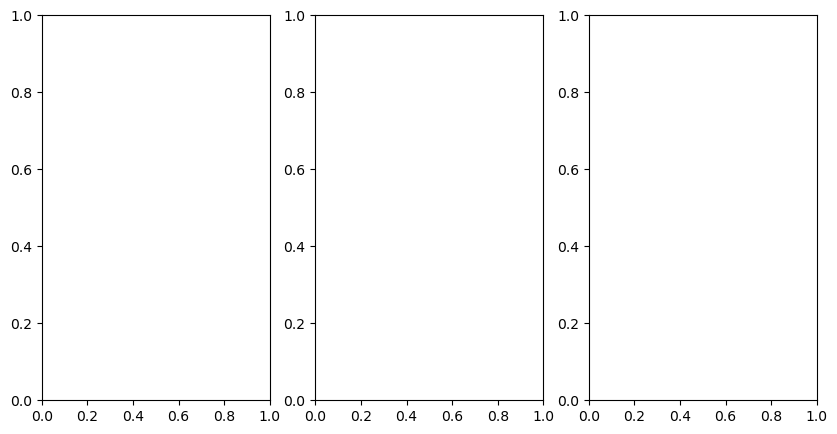

In [108]:
fig, ax = plt.subplots(1,3,figsize=[10,5])
ax.